<a href="https://colab.research.google.com/github/naga-dheeraj-p/sql_practise/blob/main/ROUGH_Modern_Portfolio_Optimization_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

#DATE RANGE
end=dt.datetime.now()
start=end - dt.timedelta(days=365)
#start=dt.datetime(2000,1,2) #its jan 2nd of 2000
print(end)
print(start)

#SELECTING STOCKS
stocklist=['RELIANCE.NS','CARYSIL.NS','KEI.NS']

data = yf.download(stocklist, start=start, end=end)
#print(data)
#print(data.index)
x=0
for i in data.index:
  x+=1
print(f"number of days market was open is :",x)

2024-01-04 12:59:53.441289
2023-01-04 12:59:53.441289
[*********************100%%**********************]  3 of 3 completed
number of days market was open is : 246


In [ ]:
closing_price=data.Close
#print(closing_price)
print(closing_price.describe())

       CARYSIL.NS       KEI.NS  RELIANCE.NS
count  247.000000   247.000000   247.000000
mean   639.018421  2232.267818  2434.887047
std    123.024046   485.211753   115.062808
min    431.600006  1426.349976  2201.250000
25%    560.625000  1715.775024  2345.550049
50%    631.500000  2328.850098  2434.050049
75%    691.699982  2605.674927  2509.099976
max    953.849976  3286.699951  2841.850098


In [ ]:
#IF U WANT THE DETAILS FOR LAST 100 DAYS
a=closing_price[closing_price.index > end-dt.timedelta(days=100)].describe()
print(a)

       CARYSIL.NS       KEI.NS  RELIANCE.NS
count   67.000000    67.000000    67.000000
mean   771.556715  2783.035080  2393.322382
std    114.180276   222.688024   100.539855
min    611.900024  2402.399902  2226.500000
25%    654.000000  2605.125000  2318.074951
50%    824.549988  2722.449951  2355.550049
75%    869.175018  2964.325073  2456.400024
max    953.849976  3286.699951  2611.699951


[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

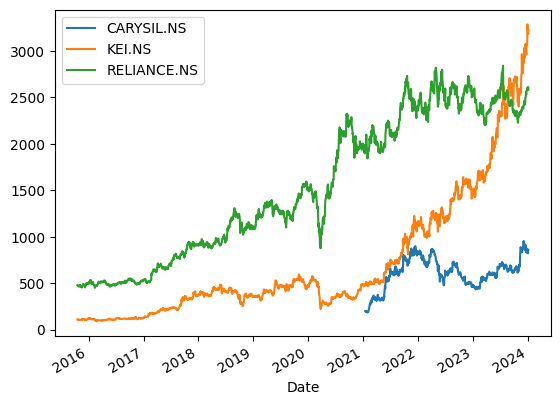

In [ ]:
end=dt.datetime.now()
start=end - dt.timedelta(days=3000)
stocklist=['RELIANCE.NS','CARYSIL.NS','KEI.NS']
data = yf.download(stocklist, start=start, end=end)
closing_price=data.Close
closing_price.plot()

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

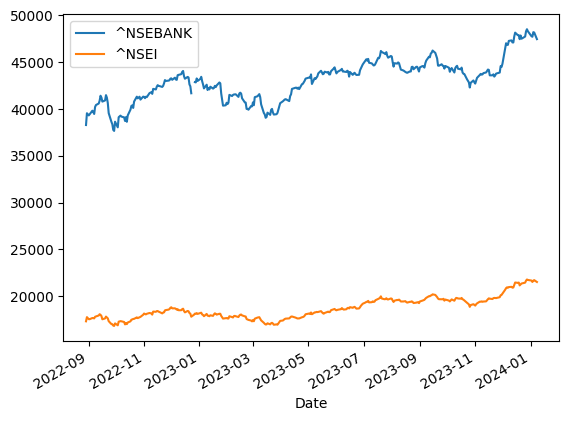

In [ ]:
# WE CAN DEVELOP SUCH GRAPHS TO SHOW RETURNS OF PORTFOLIO WRT BENCHMARK INDEX
import datetime as dt
import yfinance as yf
end=dt.datetime.now()
start=end - dt.timedelta(days=500)
stocklist=['^NSEBANK','^NSEI']
data = yf.download(stocklist, start=start, end=end)
closing_price=data.Close
closing_price.plot()

In [ ]:
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

end=dt.datetime.now()
start=end - dt.timedelta(days=3000)
stocklist=['RELIANCE.NS','CARYSIL.NS','KEI.NS']
data = yf.download(stocklist, start=start, end=end)
closing_price=data.Close
###
#print(closing_price)
def getData(stocks,start,end):
  stockData=pdr.get_data_yahoo(stocks,start=start,end=end)
  stockData=stockData['Close']
  returns=stockData.pct_change()
  meanReturns=returns.mean()
  return meanReturns
  print(meanReturns)






[*********************100%%**********************]  3 of 3 completed


In [ ]:
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
import scipy.optimize as sc

#DATE RANGE
end=dt.datetime.now()
start=end - dt.timedelta(days=5)
print(start)
print(end)
#start=dt.datetime(2000,1,2) #its jan 2nd of 2000

#SELECTING STOCKS
stocklist=['RELIANCE.NS','CARYSIL.NS','KEI.NS','SULA.NS']

data = yf.download(stocklist, start=start, end=end)
closing_price=data.Close
#print(closing_price)
stockData=closing_price.pct_change()
print(stockData*100) # will give u daywise percentage change in price
returns_integrated=stockData.sum()
#print(returns_integrated*100)
print(' ')
meanreturn=stockData.mean()
print(meanreturn*100)
mean_returns=list(meanreturn*100)
print(mean_returns)

#TO FIND OVERALL RETURNS OF PORTFOLIO
mean_returns_of_portfolio=0
for j in range(0,len(weights)):
  mean_returns_of_portfolio+=weights[i]*mean_returns[i]
print(mean_returns_of_portfolio)


covmatrix=stockData.cov()
#print(meanreturn*100)


#TO FIND THE VALUE OF INVESTMENT

x=int(input("whats ur investment amount: "))
weights=[0.25,0.25,0.25,0.25]
number_of_assests=len(weights)
'''
returns=np.sum(returns_integrated*weights)
final_value_of_investment=x+returns*x
print("final_value_of_investment is",final_value_of_investment)
'''

a=np.sum((stockData-meanreturn)**2)
variance=(a/4)
#print("Variance is:"," ",variance)
b=a/4
std=list(b**0.5)
#print("Standard Deviation is:"," ",std)

#FOR STANDARD DEVIATION OF ENTIRE PORTFOLIO
#we multiply weightage with std dev of each stock and add them
portfolio_dev=0
for i in range(0,len(weights)):
  portfolio_dev+=weights[i]*std[i]
print(portfolio_dev)


#FINDING SHARPE RATIO
def cal_sharpe_ratio(weights):
  sharpe_ratio=(mean_returns_of_portfolio-0.05)/portfolio_dev
  return sharpe_ratio

constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(len(weights)))
initializer = number_of_assests * [1/number_of_assests]

print (initializer)
print (bounds)


optimal_sharpe=sc.minimize(cal_sharpe_ratio,initializer,method = 'SLSQP',bounds = bounds,constraints = constraints)
print(optimal_sharpe)




2024-01-02 17:20:47.322799
2024-01-07 17:20:47.322799
[*********************100%%**********************]  4 of 4 completed
            CARYSIL.NS    KEI.NS  RELIANCE.NS    SULA.NS
Date                                                    
2024-01-02         NaN       NaN          NaN        NaN
2024-01-03    2.551716  1.355508    -1.087411   1.447209
2024-01-04   -2.232430  3.702210     0.516775   0.010044
2024-01-05    0.844388  1.026633     0.425550  11.381220
 
CARYSIL.NS     0.387891
KEI.NS         2.028117
RELIANCE.NS   -0.048362
SULA.NS        4.279491
dtype: float64
[0.38789127540625656, 2.0281169979973495, -0.04836174281397747, 4.27949095374908]
4.27949095374908
whats ur investment amount: 100
0.019404311771638243
[0.25, 0.25, 0.25, 0.25]
((0, 1), (0, 1), (0, 1), (0, 1))
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 217.96655318283405
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [ 0.000e+00  0.000e+00  0.000e+

In [ ]:
#waste




#just data
def getData(stocks,start,end):
  stockData=pdr.get_data_yahoo(stocks,start=start,end=end)
  stockData=stockData['Close']
  returns=stockData.pct_change()
  meanReturns=returns.mean()
  return meanReturns


  ##
  '''for i in range(weights.count()):
  a=np.sum(weights[i]* std[i])
  print(a)
'''

SyntaxError: invalid syntax (<ipython-input-1-9121e1f76a9a>, line 1)